In [162]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd

In [152]:
# cur_states = np.load("../second_collection_slower/cur_states.npy")
# ref_states = np.load("../second_collection_slower/ref_states.npy")
cur_states = np.load("../second_collection_corrected/cur_states.npy")
ref_states = np.load("../second_collection_corrected/ref_states.npy")

In [157]:
size = len(cur_states)
lim = 2000

yhat = savgol_filter(cur_states[:lim], 30, 6, axis=0) # window size 51, polynomial order 3
# np.save("../second_collection_slower/cur_states_smoothed_less.npy", yhat)

(1500.0, 2000.0)

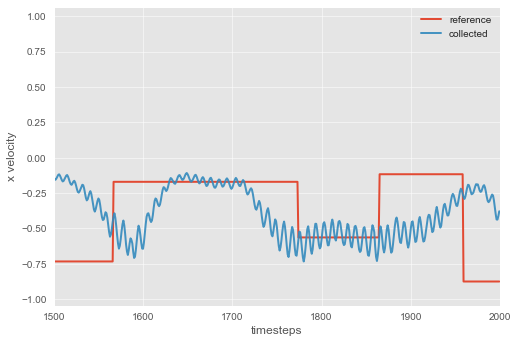

In [160]:
plt.style.use('ggplot')
plt.plot(range(lim), ref_states[:lim,0], label="reference")
plt.plot(range(lim), cur_states[:lim,0], label="collected", alpha=0.9)
# plt.plot(range(lim), yhat[:,0], label="smoothed")
plt.xlabel("timesteps")
plt.ylabel("x velocity")
plt.legend()
plt.xlim(1500, 2000)

0.20996652639188004 0.059696989407834716


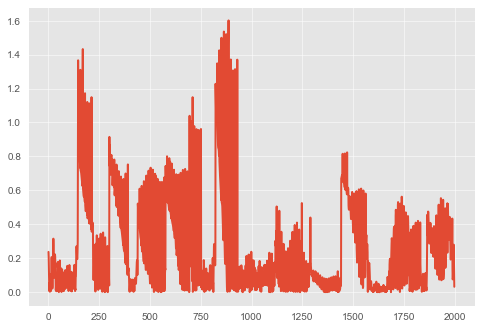

In [74]:
shift = 30
diff = abs(ref_states[:lim,0] - cur_states[shift:lim+shift,0])
print(np.mean(diff), np.var(diff))
plt.plot(range(lim), abs(diff))

Text(0, 0.5, 'mean difference')

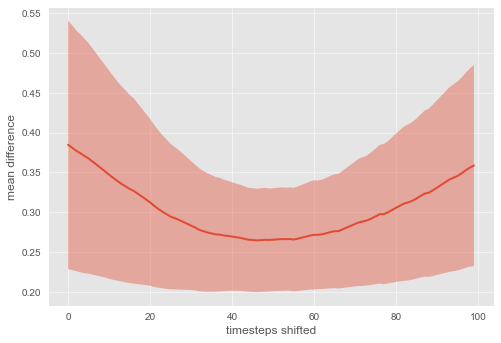

In [85]:
shifted_diff_means, shifted_diff_stds = [], []
for shift in range(100):
    diff = abs(ref_states[:lim,1] - cur_states[shift:lim+shift,1])
    mean, std = np.mean(diff), np.var(diff)
    shifted_diff_means.append(mean)
    shifted_diff_stds.append(std)
    
shifted_diff_means, shifted_diff_stds = np.array(shifted_diff_means), np.array(shifted_diff_stds)
plt.plot(range(100), shifted_diff_means)
plt.fill_between(range(100), shifted_diff_means+shifted_diff_stds, shifted_diff_means-shifted_diff_stds, alpha=0.4)
plt.xlabel("timesteps shifted")
plt.ylabel("mean difference")

(700.0, 1000.0)

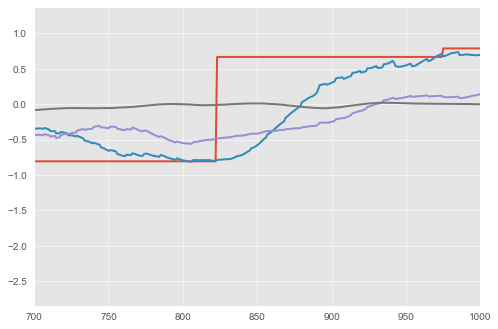

In [108]:
plt.plot(range(lim), ref_states[:lim,0])
plt.plot(range(lim), yhat)
plt.xlim(700,1000)

In [180]:
# cur_states[200:500,0]

In [105]:
yhat.shape

(178942, 3)

In [107]:
cur_states.shape

(178942, 3)

In [173]:
visible_100 = pd.read_csv("../plotting_data/visibility_comparison_2nd/run-2nd_collect_simplepredictor_100_visible_differential_0_layer_linearApr29_01-05-22-tag-validation_loss.csv")
visible_10 = pd.read_csv("../plotting_data/visibility_comparison_2nd/run-2nd_collect_simplepredictor_10_visible_differential_0_layer_linearApr29_00-28-51-tag-validation_loss.csv")
visible_50 = pd.read_csv("../plotting_data/visibility_comparison_2nd/run-2nd_collect_simplepredictor_50_visible_differential_0_layer_linearApr29_00-59-25-tag-validation_loss.csv")
visible_1 = pd.read_csv("../plotting_data/visibility_comparison_2nd/run-2nd_collect_simplepredictor_differential_0_layer_linear_shift_40Apr29_00-14-07-tag-validation_loss.csv")

(0.0, 0.1)

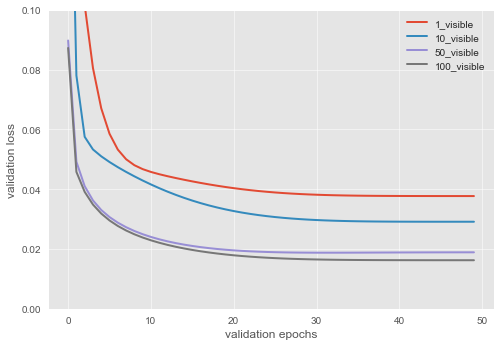

In [179]:
xs = range(50)

plt.plot(xs, visible_1["Value"][:50], label="1_visible")
plt.plot(xs, visible_10['Value'], label="10_visible")
plt.plot(xs, visible_50["Value"][:50], label="50_visible")
plt.plot(xs, visible_100["Value"][:50], label="100_visible")

plt.xlabel("validation epochs")
plt.ylabel("validation loss")

plt.legend()
plt.ylim(0, 0.1)

(0.01, 0.05)

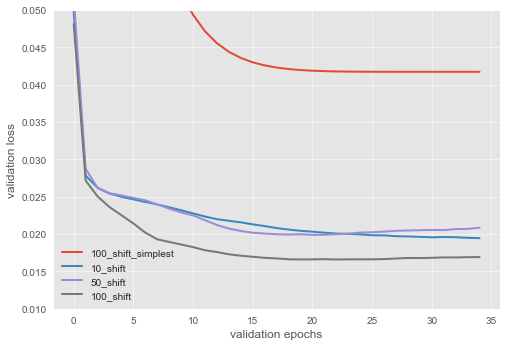

In [191]:
shift_10 = pd.read_csv("../plotting_data/shift_2nd/run-2nd_collect_psnn_10_visible_differential_shift_10Apr28_17-37-51-tag-validation_loss.csv")
shift_50 = pd.read_csv("../plotting_data/shift_2nd/run-2nd_collect_psnn_10_visible_differential_shift_50Apr28_19-34-07-tag-validation_loss.csv")
shift_100 = pd.read_csv("../plotting_data/shift_2nd/run-2nd_collect_psnn_10_visible_differential_shift_100Apr28_18-07-41-tag-validation_loss.csv")
shift_100_simplest = pd.read_csv("../plotting_data/shift_2nd/run-2nd_collect_simplepredictor_differential_0_layer_linear_shift_100Apr29_00-21-29-tag-validation_loss.csv")

size = 35
xs = range(size)

plt.plot(xs, shift_100_simplest["Value"][:size], label="100_shift_simplest")
plt.plot(xs, shift_10['Value'][:size], label="10_shift")
plt.plot(xs, shift_50["Value"][:size], label="50_shift")
plt.plot(xs, shift_100["Value"][:size], label="100_shift")

plt.xlabel("validation epochs")
plt.ylabel("validation loss")

plt.legend()
plt.ylim(0.01, 0.05)

(0.01, 0.08)

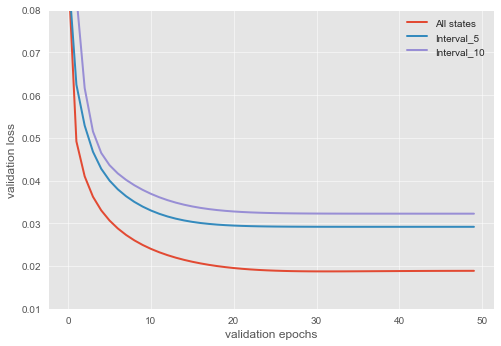

In [195]:
baseline = pd.read_csv("../plotting_data/gleaning_comparison_2nd/run-2nd_collect_simplepredictor_50_visible_differential_0_layer_linearApr29_00-59-25-tag-validation_loss.csv")
glean_5 = pd.read_csv("../plotting_data/gleaning_comparison_2nd/run-2nd_collect_simplepredictor_50_visible_5_interval_differential_0_layer_linearApr29_15-49-47-tag-validation_loss.csv")
glean_10 = pd.read_csv("../plotting_data/gleaning_comparison_2nd/run-2nd_collect_simplepredictor_50_visible_10_interval_differential_0_layer_linearApr29_14-43-13-tag-validation_loss.csv")

size = 50
xs = range(size)

plt.plot(xs, baseline["Value"][:size], label="All states")
plt.plot(xs, glean_5['Value'][:size], label="Interval_5")
plt.plot(xs, glean_10["Value"][:size], label="Interval_10")


plt.xlabel("validation epochs")
plt.ylabel("validation loss")

plt.legend()
plt.ylim(0.01, 0.08)

(0.0, 0.001)

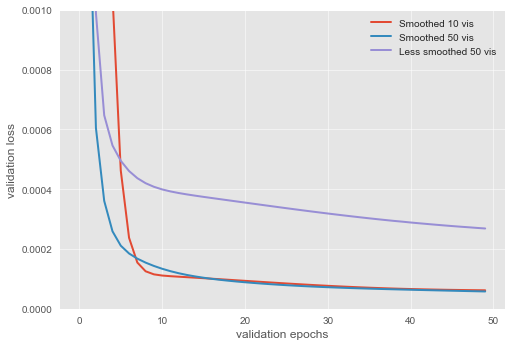

In [199]:
smooth_10 = pd.read_csv("../plotting_data/smoothing_simple/run-2nd_collect_simplepredictor_10_visible_smoothed_differential_0_layer_linearApr29_22-40-01-tag-validation_loss.csv")
smooth_50 = pd.read_csv("../plotting_data/smoothing_simple/run-2nd_collect_simplepredictor_50_visible_smoothed_differential_0_layer_linearApr29_22-50-48-tag-validation_loss.csv")
smooth_less_50 = pd.read_csv("../plotting_data/smoothing_simple/run-2nd_collect_simplepredictor_50_visible_smoothed_less_differential_0_layer_linearApr29_23-02-20-tag-validation_loss.csv")

size = 50
xs = range(size)

plt.plot(xs, smooth_10["Value"][:size], label="Smoothed 10 vis")
plt.plot(xs, smooth_50['Value'][:size], label="Smoothed 50 vis")
plt.plot(xs, smooth_less_50["Value"][:size], label="Less smoothed 50 vis")


plt.xlabel("validation epochs")
plt.ylabel("validation loss")

plt.legend()
plt.ylim(0, 0.001)

(0.0, 0.03)

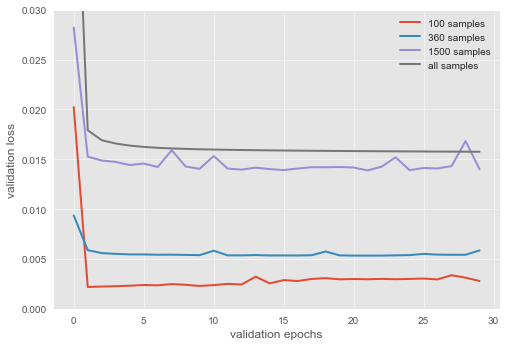

In [204]:
train_size_100 = pd.read_csv("../plotting_data/train_size_simple/run-simplepredictor_differential_1_layer_linear_2D_100_samplesApr12_16-52-25-tag-validation_loss.csv")
train_size_360 = pd.read_csv("../plotting_data/train_size_simple/run-simplepredictor_differential_1_layer_linear_2D_360_samplesApr12_17-38-15-tag-validation_loss.csv")
train_size_1500 = pd.read_csv("../plotting_data/train_size_simple/run-simplepredictor_differential_1_layer_linear_2D_1500_samplesApr13_20-08-45-tag-validation_loss.csv")
train_size_full = pd.read_csv("../plotting_data/train_size_simple/run-simplepredictor_differential_1_layer_linear_2DApr12_16-12-05-tag-validation_loss.csv")

size = 30
xs = range(size)

plt.plot(xs, train_size_100["Value"][:size], label="100 samples")
plt.plot(xs, train_size_360['Value'][:size], label="360 samples")
plt.plot(xs, train_size_1500["Value"][:size], label="1500 samples")
plt.plot(xs, train_size_full["Value"][:size], label="all samples")

plt.xlabel("validation epochs")
plt.ylabel("validation loss")

plt.legend()
plt.ylim(0, 0.03)

(0.0, 0.015)

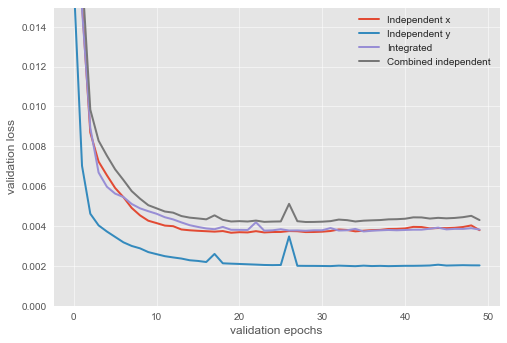

In [213]:
independent_x = pd.read_csv("../plotting_data/stacked_independent/run-psnn_100_visible_differential_independentApr16_21-27-51-tag-validation_loss_0.csv")
independent_y = pd.read_csv("../plotting_data/stacked_independent/run-psnn_100_visible_differential_independentApr16_21-27-51-tag-validation_loss_1.csv")
integrated = pd.read_csv("../plotting_data/stacked_independent/run-psnn_100_visible_differentialApr16_16-51-57-tag-validation_loss.csv")
combined_independent = np.sqrt(independent_x["Value"] ** 2 + independent_y["Value"] ** 2)

size = 50
xs = range(size)

plt.plot(xs, independent_x["Value"][:size], label="Independent x")
plt.plot(xs, independent_y['Value'][:size], label="Independent y")
plt.plot(xs, integrated["Value"][:size], label="Integrated")
plt.plot(xs, combined_independent[:size], label="Combined independent")

plt.xlabel("validation epochs")
plt.ylabel("validation loss")

plt.legend()
plt.ylim(0, 0.015)

0     0.032283
1     0.016694
2     0.009837
3     0.008281
4     0.007533
        ...   
95    0.004477
96    0.004487
97    0.004504
98    0.004499
99    0.004536
Name: Value, Length: 100, dtype: float64